# Paper: To treat or not to treat: the case of tuberculosis

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

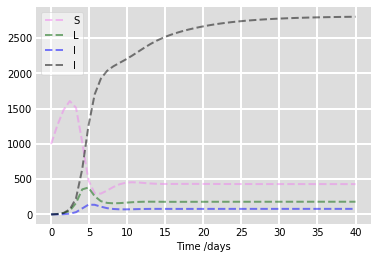

In [5]:
# Initial conditions
S0 = 1000
L0 = 0
I0 = 1
T0 = 0
N = S0 + L0 + I0 + T0

# A grid of time points (in days)
t = np.linspace(0, 40, 50) 

#parameters
delta  = 500
beta = 13
c = 1
mu = 0.143
k = 0.5
r_1 = 2 
r_2 = 1
beta_prime = 13
d = 0

# The SIR model differential equations.
def deriv(y, t, N, delta  ,beta ,c ,mu ,k ,r_1 ,r_2 ,beta_prime,d ):
    S, L, I, T= y

    dSdt = delta - beta * c * S * I / N - mu * S
    dLdt = beta * c * S * I / N - (mu + k + r_1) * L + beta_prime * c * T * 1/N
    dIdt = k*L - (mu + d) * I - r_2 * I
    dTdt = r_1 * L + r_2 * I - beta_prime * c * T * 1/N - mu*T

    return dSdt, dLdt, dIdt, dTdt


# Initial conditions vector
y0 = S0, L0, I0, T0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, delta  ,beta ,c ,mu ,k ,r_1 ,r_2 ,beta_prime,d ))
S, L, I, T = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='S', linestyle='dashed')
ax.plot(t, L, 'darkgreen', alpha=0.5, lw=2, label='L', linestyle='dashed')
ax.plot(t, I, 'blue', alpha=0.5, lw=2, label='I', linestyle='dashed')
ax.plot(t, T, 'black', alpha=0.5, lw=2, label='I', linestyle='dashed')

ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [7]:
#save to csv file
a = np.asarray([t, S, L, I, T]) 

# np.savetxt("tuberculosis.csv", a, delimiter=",")